<a href="https://colab.research.google.com/github/SampMark/Machine-Learn/blob/main/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelando uma Árvore de Decisão (*Decision Trees*)**

Árvores de decisão são algoritmos versáteis de *machine learn* capazes de realizar tarefas de classificação e regressão e, até mesmo tarefas de múltiplas saídas. O algoritmo cria uma estrutura de árvore para classificar as "instâncias", com base em regras aprendidas a partir dos dados utilizados.

Em linhas gerais, construir uma árvore de decisão é como construir um “mapa de decisões”, a partir do qual é possível raciocinar para se chegar a determinada decisão mais apropriada - a ser tomada com base no conjunto de dados, isto é, de evidências disponíveis. Funciona como uma espécie de fluxograma aprimorado que nos ajuda a tomar decisões melhores.

Uma árvore de decisão é basicamente uma estrutura que representa uma série de decisões em forma de árvore, com cada nó representando uma pergunta e cada ramo um possível resultado. Em linha gerais, o algoritmo funciona dividindo iterativamente um conjunto de dados com base em valores dos atributos (*features*) até que os dados estejam organizados em grupos puros ou homogêneos.

**A Estrutura de uma Árvore de Decisão**

Uma árvore de decisão é composta por três tipos principais de nós:

* **Raiz**: O nó no topo da árvore, onde começa a divisão dos dados e a primeira decisão é tomada.
* **Nós internos**: representam decisões baseadas nos atributos do conjunto de dados, um teste em um atributo (ex: idade < 18?).
** **Ramos**:  A partir disso, cada nó interno avalia uma determinda condição sobre um atributo e, com base nisso, cria uma ramificação para um subconjunto dos dados. Os ramos conectam os nós e representam os resultados do teste (sim ou não).
* **Nós Folhas**: os nós terminais da árvore representam a decisão final ou a classe à qual uma instância de dados pertence. O nó terminal indica a classe final ou decisão (ex: aprovado, reprovado).

Em suma, cada **nó interno** representa um teste em um atributo, cada **ramo** representa o resultado do teste e cada **nó folha** representa uma classe.

As árvores de decisão também são os componentes fundamentais das "florestas aleatórias" (*random forests*), que estão entre os algoritmos de aprendizado de máquina mais poderosos atualmente. Imagine a possibilidade de combinar várias árvores de decisão de modo a criar um modelo ainda mais robusto e preciso.

Em outras palavras, imagine que, em vez de ter apenas uma árvore de decisão para tomar uma decisão específica, agora se tem uma "floresta inteira", em que cada árvore contribui dando seu "voto", poderando sobre qual deve ser a resposta final. Tais algoritmos são capazes de se ajustar a um conjuntos de dados cada vez mais complexos.

## **Instalando e importando as bibliotecas necessárias**

In [2]:
!pip install pandas        # Instala pandas para manipulação e análise de dados
!pip install matplotlib      # Instala matplotlib para criação de gráficos e visualizações
!pip install seaborn         # Instala seaborn para visualização estatística de dados
!pip install numpy          # Instala numpy para computação numérica, incluindo arrays multidimensionais
!pip install scikit-learn    # Instala scikit-learn para aprendizado de máquina
!pip install pydotplus      # Instala pydotplus para gerar gráficos no formato dot
!apt-get install -y graphviz  # Instala Graphviz para visualização de gráficos

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [3]:
# Importa bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier

## **Estudo de caso: árvore de decisão para ajudar a prescrever o medicamento adequado**

Imagine que um cientista de dados deseja auxiliar um médico pesquisador para um estudo científico sobre um grupo de pacientes que sofrem ou sofreram da mesma doença. Durante o tratamento, cada paciente respondeu de forma diferenciada a um dos cinco medicamentos: Drug A, Drug B, Drug C, Drug X e Drug Y.

O objetivo do estudo é construir um modelo usando algoritmos de árvore de decisão para identificar qual medicamento pode ser o mais apropriado para um paciente específico com o mesmo quadro clínico. As variáveis desse conjunto de dados incluem idade (*Age*), sexo (*Sex*), pressão arterial (*Blood Pressure*) e nível de colesterol (*Cholesterol*) dos pacientes, e o alvo é o nível de resposta (Na_to_K) ao qual cada paciente respondeu a determinado medicamento.

Este é um exemplo de problema de classificação múltiplo (multiclasse), no qual uma parte do conjunto de dados será usada para o treinamento do modelo, permitindo a construção de uma árvore de decisão. Em seguida, o modelo poderá ser usado para prever a classe de um paciente desconhecido, ajudando a prescrever o medicamento adequado para novos pacientes.

## **Importando e explorando os dados**

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/SampMark/files/refs/heads/main/drug200.csv')
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [6]:
# Imprime informações sobre a dimensão do arquivo CSV
print(f"O conjunto de dados (drug200.csv) possui {data.shape[0]} linhas e {data.shape[1]} colunas.")

O conjunto de dados (drug200.csv) possui 200 linhas e 6 colunas.


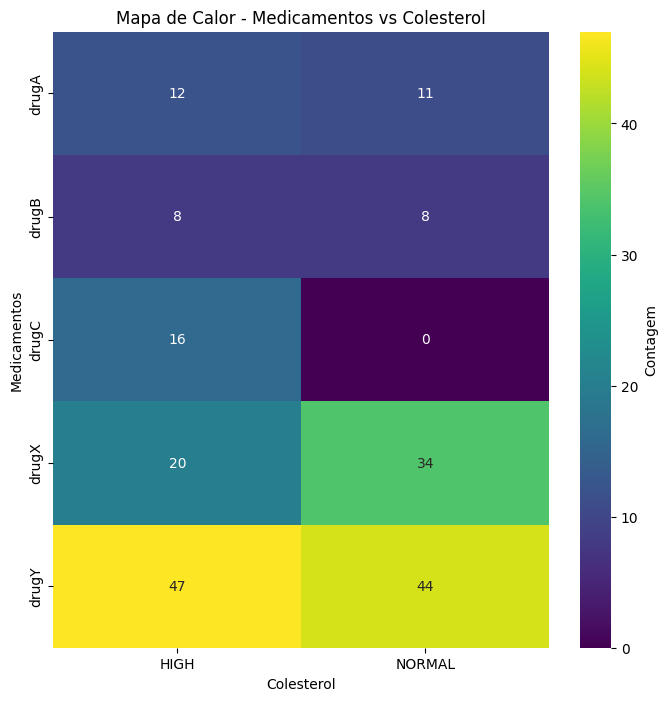

In [9]:
# Plota o mapa de calor entre as variáveis Medicamentos vs Colesterol
plt.figure(figsize=(8, 8))

# Cria DataFrame de contagem
df_2dhist = data.pivot_table(index='Drug', columns='Cholesterol', aggfunc='size', fill_value=0)

# Plota o heatmap
sns.heatmap(df_2dhist, cmap='viridis', annot=True, fmt="d", cbar_kws={'label': 'Contagem'})

# Configura os rótulos dos eixos
plt.xlabel('Colesterol')
plt.ylabel('Medicamentos')
plt.title('Mapa de Calor - Medicamentos vs Colesterol')
plt.show()


## **Análise da Matriz de Calor - Medicamentos *vs* colesterol**

Algumas observações iniciais sobre a relação entre os tipos de medicamento e o nível de colesterol dos pacientes:

1. **Medicamento DrugA**: 12 pacientes com colesterol alto e 11 com colesterol normal usaram a DrugA.

2. **Medicamento DrugB**: Este medicamento apresenta uma distribuição igual entre as duas categorias de colesterol, indicando que a escolha desse medicamento é menos comum ou não depende do nível de colesterol.

3. **Medicamento DrugC**: Apenas pacientes com colesterol alto (16) usaram o medicamento DrugC, sendo preferencialmente ou exclusivamente indicado para pacientes com colesterol alto.

4. **Medicamento DrugX**: 20 pacientes com colesterol alto usaram DrugX, enquanto 34 pacientes com colesterol normal, sendo mais comumente utilizado por pacientes com colesterol normal.

5. **Medicamento DrugY**: 47 pacientes com colesterol alto usaram DrugY, e 44 com colesterol normal também usaram esse medicamento, tanto DrugA, como DrugY apresentam uma distribuição quase uniforme, sugerindo que o uso é independentemente do nível de colesterol.

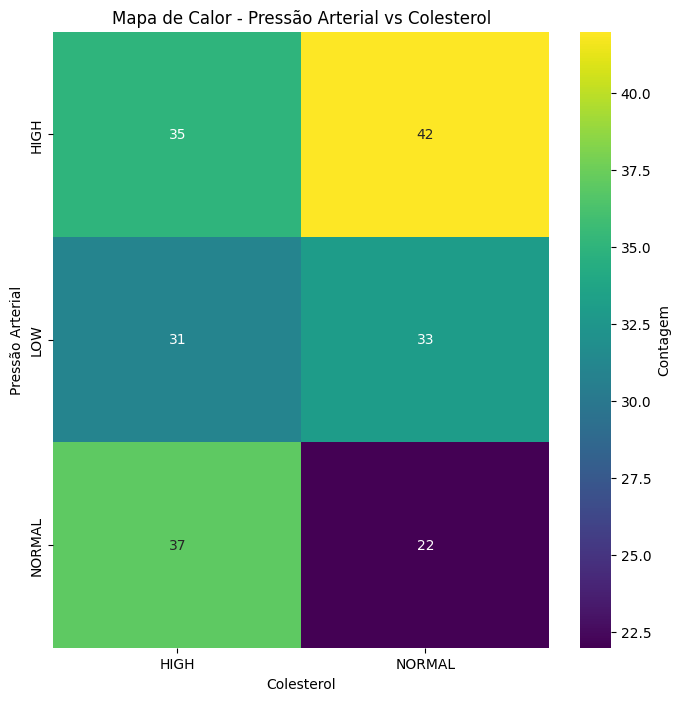

In [8]:
# Plota de mapa de calor das variáveis Pressão Arterial vs Colesterol
plt.figure(figsize=(8, 8))

# Criação do DataFrame de contagem
df_2dhist = data.pivot_table(index='BP', columns='Cholesterol', aggfunc='size', fill_value=0)

# Plot do heatmap
sns.heatmap(df_2dhist, cmap='viridis', annot=True, fmt="d", cbar_kws={'label': 'Contagem'})

# Configuração dos rótulos dos eixos
plt.xlabel('Colesterol')
plt.ylabel('Pressão Arterial')
plt.title('Mapa de Calor - Pressão Arterial vs Colesterol')
plt.show()

## **Análise da Matriz de Calor: Colesterol versus Pressão Arterial (BP)**

A matriz de calor visualiza a relação entre dois fatores de saúde de pacientes: nível de colesterol (eixo Y) e nível de pressão arterial (BP) (eixo X), com os valores representando a contagem de pacientes para cada combinação.

* **Eixo X - Pressão Arterial (BP)**: LOW (pressão arterial baixa), NORMAL (pressão arterial normal) e HIGH (pressão arterial alta).

* **Eixo Y (Colesterol)**: NORMAL (colesterol normal) ou HIGH (colesterol alto).

Pacientes com colesterol alto, em linhas gerais, estão mais propensos a apresentar pressão arterial alta, indicando um possível perfil de risco que requer maior atenção em termos de manejo clínico e terapêutico.

A matriz de calor revela possivelmente que os dados estão "desequilibrados", devido abaixa representatividade de pacientes com colesterol normal e pressão arterial normal, isto sugere um viés no conjunto de dados.

Conforme a literatura pesquisada, é importante garantir que o conjunto de dados seja balanceado, especialmente para modelos preditivos que busquem generalizar o comportamento dos dados.

In [14]:
# Seleciona as colunas relevantes do DataFrame 'data' e as converte em um array NumPy
X = data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:10] # Exibe as 10 primeiras linhas do array

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043],
       [22, 'F', 'NORMAL', 'HIGH', 8.607],
       [49, 'F', 'NORMAL', 'HIGH', 16.275],
       [41, 'M', 'LOW', 'HIGH', 11.037],
       [60, 'M', 'NORMAL', 'HIGH', 15.171],
       [43, 'M', 'LOW', 'NORMAL', 19.368]], dtype=object)

**Convertendo variáveis categóricas em numéricas**

Como se pode observar, algumas variáveis neste conjunto de dados são categóricas, como `Sex`, `BP` e `Cholesterol`. Como o `DecisionTreeClassifier` não lida com variáveis ​​​​categóricas, é necessário convertê-las em valores numéricos usando `LabelEncoder` para convertê-las em variáveis ​​numéricas.

In [15]:
# Importa o módulo 'preprocessing' do scikit-learn para realizar a codificação de rótulos
from sklearn import preprocessing

# Cria um objeto LabelEncoder para a coluna 'Sex'
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F', 'M'])  # Ajusta o codificador com os valores possíveis ('F' e 'M')
X[:, 1] = le_sex.transform(X[:, 1])  # Transforma os valores da coluna 'Sex' (índice 1) em valores numéricos

# Cria um objeto LabelEncoder para a coluna 'BP'
le_BP = preprocessing.LabelEncoder()
le_BP.fit(['LOW', 'NORMAL', 'HIGH'])  # Ajusta o codificador com os valores possíveis ('LOW', 'NORMAL', 'HIGH')
X[:, 2] = le_BP.transform(X[:, 2])  # Transforma os valores da coluna 'BP' (índice 2) em valores numéricos

# Cria um objeto LabelEncoder para a coluna 'Cholesterol'.
le_Chol = preprocessing.LabelEncoder()
le_Chol.fit(['NORMAL', 'HIGH'])  # Ajusta o codificador com os valores possíveis ('NORMAL', 'HIGH')
X[:, 3] = le_Chol.transform(X[:, 3])  # Transforma os valores da coluna 'Cholesterol' (índice 3) em valores numéricos

X[0:10]  # Exibe as 10 primeiras linhas do array após a codificação para verificar as transformações


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043],
       [22, 0, 2, 0, 8.607],
       [49, 0, 2, 0, 16.275],
       [41, 1, 1, 0, 11.037],
       [60, 1, 2, 0, 15.171],
       [43, 1, 1, 1, 19.368]], dtype=object)

In [18]:
# Atribui a coluna "Drug" do DataFrame à variável 'y'
y = data["Drug"]
y[0:5]

,Drug
0,drugY
1,drugC
2,drugC
3,drugX
4,drugY


# **Modelando a Árvore de Decisão**

Para construir a árvore de decisão será criada a divisão do conjunto de dados em treineo e teste, para tal será importada a função `train_test_split` de `sklearn.model_selection`.

O objetivo principal dessa etapa é garantir que o modelo seja avaliado de forma adequada, verificando-se a consistência entre os atributos e os rótulos. Também busca evitar *overfitting*, quando o modelo "decora" os dados de treinamento e não generaliza bem para novos dados.

In [20]:
from sklearn.model_selection import train_test_split  # Importa a função train_test_split para dividir os dados em conjuntos de treinamento e teste
from sklearn.linear_model import LogisticRegression  # Importa a classe LogisticRegression para criar um modelo de regressão logística.
from sklearn.metrics import accuracy_score  # Importa a função accuracy_score para calcular a acurácia do modelo

# Divide os dados em conjuntos de treinamento e teste.
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [23]:
# Imprime o formato (shape) dos conjuntos de treinamento X_trainset e y_trainset
print('Formato do X_trainset:', X_trainset.shape)
print('Formato do y_trainset:', y_trainset.shape)

# Verifica se o número de linhas em X_trainset corresponde ao número de linhas em y_trainset
if X_trainset.shape[0] == y_trainset.shape[0]:
    print('Dimensões correspondem.')  # Se corresponderem, imprime "Dimensões correspondem."
else:
    print('Dimensões não correspondem!')  # Caso contrário, imprime "Dimensões não correspondem!"

Formato do X_trainset: (140, 5)
Formato do y_trainset: (140,)
Dimensões correspondem.


In [28]:
print('Formato do conjunto de treino X {}'.format(X_trainset.shape),'e','tamanho do conjunto de treino Y {}'.format(y_trainset.shape))

Formato do conjunto de treino X (140, 5) e tamanho do conjunto de treino Y (140,)


In [26]:
# Imprime o formato (shape) dos conjuntos de teste X_testset e y_testset, certifica se as Dimensões correspondem
print('Formato do X_testset:', X_testset.shape)
print('Formato do y_testset:', y_testset.shape)

if X_testset.shape[0] == y_testset.shape[0]:
  print('Dimensões correspondem.')
else:
  print('Dimensões não correspondem!')

Formato do X_testset: (60, 5)
Formato do y_testset: (60,)
Dimensões correspondem.


In [29]:
print('Formato do conjunto de teste X {}'.format(X_testset.shape),'e','tamanho do conjunto de Y {}'.format(y_testset.shape))

Formato do conjunto de teste X (60, 5) e tamanho do conjunto de Y (60,)


# **Modelagem**

Nesta etapa, com poucas linhas de código, será criado e treinado o modelo de árvore de decisão. O qual usará os dados de treinamento para aprender os padrões e relações entre os atributos dos pacientes (idade, sexo, pressão arterial, nível de colesterol etc.), de modo predizer o medicamento mais eficaz para perfil de paciente.

`DecisionTreeClassifier`é o classificador para criação da árvore de decisão que utiliza os seguintes parâmetros:

* `criterion="entropy"`: serve para definir a métrica utilizada para medir a qualidade das divisões. O critério entropia mede a desordem ou impureza das classes. A divisão reduz a entropia no conjunto resultante.
* `max_depth=4`: define a profundidade máxima da árvore, é um hiperparâmetro importante para evitar overfitting. A profundidade máxima da árvore terá, por escolha, no máximo 4 níveis de nós, garantindo uma estrutura mais simples e generalizada.

In [45]:
# Cria o modelo de árvore de decisão com 'entropy' como critério e a profundidade máxima escolhida
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [46]:
# Treina o modelo com os dados de treinamento
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

# **Revisão sobre os parâmetros para modelagens no scikit-learn**

A escolha do critério depende do problema (classificação ou regressão) e da eficiência desejada. Para classificação, os critérios mais comuns são Gini e Entropia, enquanto para regressão, MSE e redução de variância são mais amplamente usados.

Para modelos de classificação:
* `entropy`: Entropia ou Ganho de Informação. Produz divisões mais "perfeitas", porém, é computacionalmente mais pesado devido ao logaritmo.
* `gini`: Índice de Gini (Padrão), é mais eficiente computacionalmente, mas os resultados podem ser ligeiramente menos precisos.

Para modelos de regressão:

* `squared_error`: Erro Quadrático Médio (Padrão).
* `friedman_mse`: Versão otimizada do erro quadrático médio, usada em algoritmos como *Gradient Boosting*.
* `absolute_error`: Erro absoluto médio (também chamado de "L1 loss").
* `poisson`: Perda Poisson, usada para problemas de regressão com dados de contagem.

É importante avaliar o desempenho do modelo em um conjunto de validação, isto  ajudará a determinar qual critério funciona melhor em cada caso específico.

# **Predição**

Nesta etapa é realizada a predição do modelo de árvore de decisão treinado por meio de um conjunto de teste. Em seguida, avalia-se a acurácia do modelo com base nos rótulos reais, isto é, a porcentagem de instâncias no conjunto de teste que o modelo classificou corretamente.

**Explanação**:
O método `.predict()` é chamado no modelo treinado (`drugTree`) para prever as classes do conjunto de teste X_testset. O resultado é armazenado na variável `predTree`, que contém as classes previstas para cada instância no conjunto de teste.

In [56]:
# Realiza a predição
predTree = drugTree.predict(X_testset)
print(predTree[0:5])  # Primeiras 5 predições
print(y_testset[0:5])  # Primeiros 5 rótulos reais


['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


# **Análise da Acurácia**

Conforme resultado abaixo, o modelo apresentou acurácia de 98,33%, aparentando um desempenho satifatório.

Todavia, uma acurácia muito alta pode ser sinal de *overfitting*, caso o conjunto de teste não represente bem os dados reais.É importante validar o modelo com um conjunto de validação independente.

Conforme observado no Mapa de Calor (Pressão Arterial vs Colesterol) acima, caso o conjunto de dados tenha classes desbalanceadas, ou seja, algumas classes são muito mais frequentes do que outras, a acurácia alta pode não refletir um bom desempenho para classes minoritárias.

Portanto, é importante analisar métricas adicionais, como a **matriz de confusão** para verificar quais classes o modelo teve mais dificuldade em prever, e calcular métricas adicionais como **precisão**, **recall** e **F1-score** para avaliar o desempenho do modelo em cada classe. Além disso, pode-se realizar validação cruzada para garantir a robustez do modelo e evitar sobreajuste.

In [58]:
from sklearn import metrics
print("Acurácia do Modelo Árvore de Decisão: ", metrics.accuracy_score(y_testset, predTree))

Acurácia do Modelo Árvore de Decisão:  0.9833333333333333


## **Análise da Matriz de Confusão**

A matriz de confusão abaixo compara as previsões do modelo com os rótulos reais para diferentes classes de medicamentos: drugA, drugB, drugC, drugX, e drugY.
Cada linha representa a classe real (rótulos verdadeiros) e cada coluna representa a classe prevista pelo modelo. O valor em cada célula indica o número de vezes que uma classe verdadeira foi classificada como outra classe específica.

1. **Diagonal Principal**: as contagens para cada classe representam as predições corretas para cada classe, isto é, são os casos em que o rótulo previsto coincide com o rótulo real:
 * **drugA**: 7 predições corretas.
 * **drugB**: 5 predições corretas.
 * **drugC**: 5 predições corretas.
 * **drugX**: 20 predições corretas.
 * **drugY**: 22 predições corretas.

2. **Erros de Classificação**: os valores fora da diagonal principal representam erros de classificação, ou seja, casos em que o modelo classificou uma instância incorretamente. Observa-se que houve um erro de classificação da instância de **drugX** classificada incorretamente como **drugY**.

Em suma, a maioria das predições na diagonal principal indicam que o modelo possui uma acurácia alta, consistente com a observada anteriormente (98,33%).


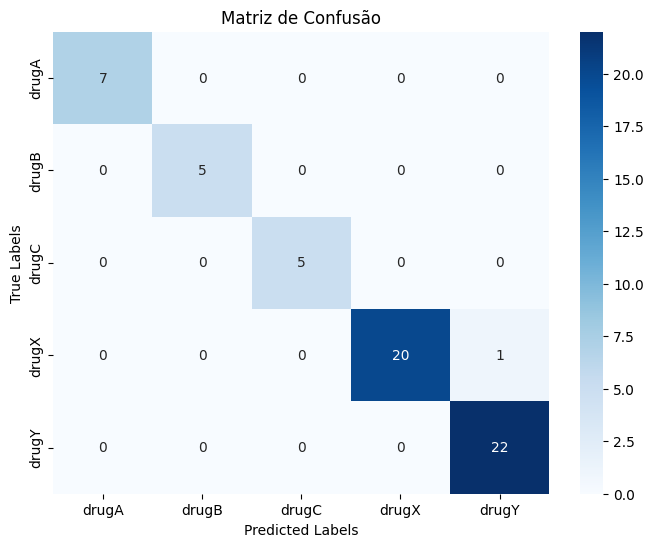

In [55]:
from sklearn.metrics import confusion_matrix

# Criar matriz de confusão
conf_matrix = confusion_matrix(y_testset, predTree)

# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=drugTree.classes_, yticklabels=drugTree.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Matriz de Confusão")
plt.show()

## **Relatório de Classificação**

Três métricas foram utilizadas para avaliar o desempenho do modelo em cada classe: *precision*, *recall* e F1-score, considerando-se a eficácia em identificar corretamente cada classe, cada métrica fornece uma visão diferente sobre a performance do modelo.

* **Precision**: mede a proporção de predições corretas para uma determinada classe em relação ao total de predições feitas para essa classe.
* **Recall**: mede a proporção de instâncias de uma classe que foram corretamente identificadas pelo modelo em relação ao total de instâncias reais dessa classe.
* **F1-score**: é a média harmônica entre *precision* e *recall*, verifica se existe um equilíbrio entre a importância de ambos. O F1-score é mais baixo quando há uma discrepância entre ambos.

In [54]:
from sklearn.metrics import classification_report
# Exibir métricas detalhadas
print(classification_report(y_testset, predTree))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         5
       drugC       1.00      1.00      1.00         5
       drugX       1.00      0.95      0.98        21
       drugY       0.96      1.00      0.98        22

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60



**Macro Avg**: A média macro calcula a média das métricas de cada classe individualmente, sem considerar o número de instâncias em cada classe. Os valores próximos de 1 indicam que o modelo tem um bom desempenho em todas as classes de forma uniforme.

**Weighted Avg**: A média ponderada leva em conta o suporte de cada classe, ou seja, quantas instâncias cada classe possui. Valores elevados indicam que o modelo teve um desempenho consistente mesmo considerando a proporção de cada classe no conjunto de dados.

Em suma, os resultados mostram que o modelo está bem ajustado e capaz de classificar adequadamente as instâncias de diferentes medicamentos, com erros mínimos.

## **Análise do Modelo da Árvore de Decisão**

A árvore de decisão representa o modelo treinado para classificar os tipos de medicamentos com base em um conjunto de variáveis (features) associadas a características dos pacientes.

**Estrutura e Decisões da Árvore (imagine uma "árvore" invertida)**

* **Raiz da Árvore**: A árvore começa com uma decisão baseada em x[4] <= 14.615, indicando que x[4] é a característica mais importante para a primeira divisão. Tal escolha foi feita com base no critério de entropia, que busca maximizar a separação entre as classes.

* **Divisões Internas**: Cada nó interno representa uma decisão baseada em uma característica e um valor de limiar. Por exemplo, x[0] <= 50.5 no segundo nível da árvore é uma das divisões internas. A entropia e a quantidade de amostras são exibidas em cada nó. Quanto menor a entropia, mais puro é o nó. Ou seja, contém predominantemente uma única classe.

* **Nós Folha**: mostram as classes finais atribuídas pelo modelo e a quantidade de amostras para cada classe. Por exemplo, um nó folha com value = [0, 0, 11, 0, 0] indica que ele classifica todas as amostras como drugC. A entropia é zero nos nós folha, indicando que todas as amostras do nó pertencem à mesma classe.

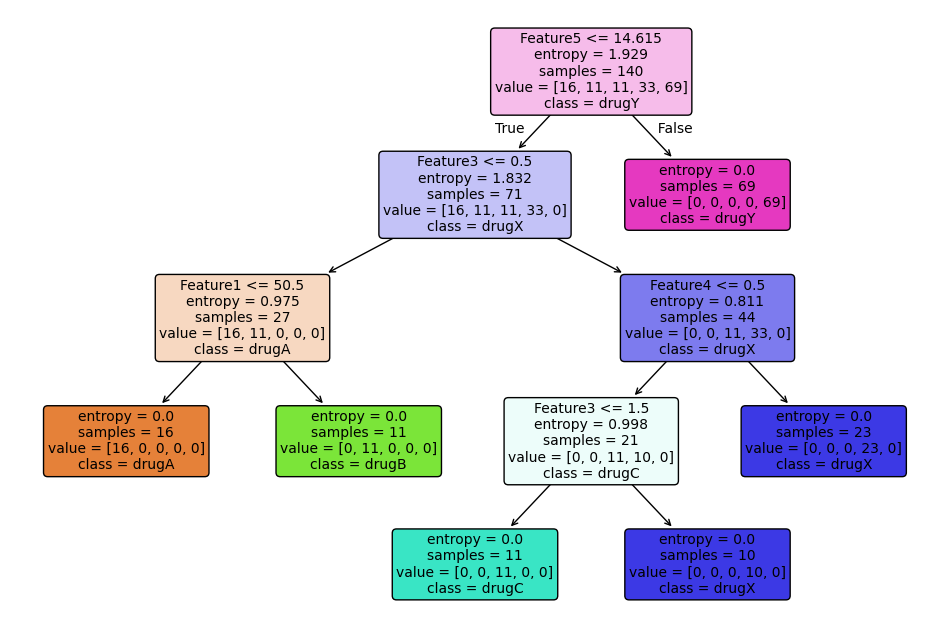

In [61]:
import matplotlib.pyplot as plt
from sklearn import tree
import os

# Configurar o PATH para Graphviz
os.environ["PATH"] += os.pathsep + '/usr/bin/'

# Ajuste da figura para uma visualização mais clara
plt.figure(figsize=(12, 8))

# Plota a árvore de decisão colorida
tree.plot_tree(
    drugTree,
    feature_names=["Feature1", "Feature2", "Feature3", "Feature4", "Feature5"],  # substitua pelos nomes das features reais
    class_names=["drugA", "drugB", "drugC", "drugX", "drugY"],
    filled=True,
    rounded=True,
    fontsize=10
)
# Exibindo a árvore
plt.show()

## **Exemplos com base no fluxograma de decisão** (em revisão)

**Exemplo 1**: Paciente Mulher, Meia-idade, com Pressão Arterial e Colesterol Altos
Considerando as seguintes características, é só seguir os passos ou critérios (nós) da árvore de decisão:

* **Feature5 <= 14.615**: Essa condição seria específica do valor da Feature5. Como não se dispões dos valores exatos de cada característica, assume-se que a paciente satisfaz essa condição, seguimos para o lado "True".

* **Feature3 <= 0.5**: supondo que essa característica representa a variável colesterol, que, sendo alto, seguimos pelo ramo "True" novamente.

* **Feature1 <= 50.5**: supondo essa condição relacionada à idade, como o paciente é de meia-idade, vamos supor que essa condição seja satisfeita.

Após seguir essas condições, chegamos ao nó folha onde a classe é drugA. Portanto, a medicação indicada para uma paciente com essas características seria drugA.

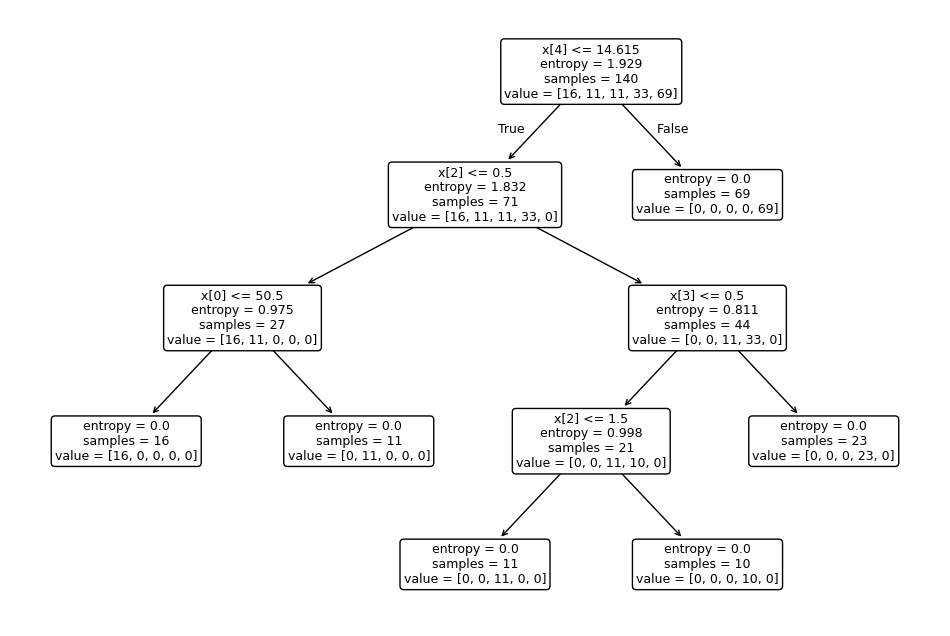

In [71]:
# Plota a árvore de decisão colorida P&B
plt.figure(figsize=(12, 8))
tree.plot_tree(drugTree, rounded=True, fontsize=9)

plt.show()

## **Referências**

GÉRON, A. **Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems**. Canada: O’Reilly, 2023.